In [1]:
from load_prep_sample import prep_sample

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from kerastuner import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Conv2D

from VGG16BP import build_model_VGG16BP

2024-04-26 10:58:12.271945: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 10:58:12.305966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 10:58:12.882410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_20232/3586776484.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [2]:
X_train, X_test, y_train, y_test = prep_sample (nb = 900,
                                                size = 224,
                                                expo = True,
                                                norm = True,
                                                canal = 3, 
                                                test_size = 0.25,
                                                random_state = 48)

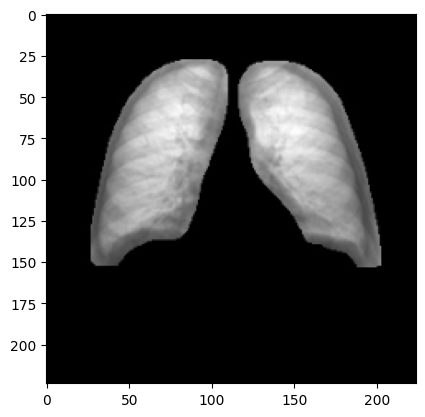

In [3]:
plt.imshow(X_test[0])

In [4]:

new_model = build_model_VGG16BP()

2024-04-26 10:58:50.482223: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 10:58:50.515629: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 10:58:50.515677: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 10:58:50.517864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-26 10:58:50.517938: I external/local_xla/xla/stream_executor

In [5]:
history = new_model.fit(X_train, 
                        y_train, 
                        epochs=30, 
                        batch_size= 64,
                        validation_data=(X_test, y_test))

Epoch 1/30


I0000 00:00:1714121934.478185   20582 service.cc:145] XLA service 0x7f76b8002610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714121934.478335   20582 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-04-26 10:58:54.514957: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-26 10:58:54.732605: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
I0000 00:00:1714121936.598577   20655 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2184', 428 bytes spill stores, 428 bytes spill loads

I0000 00:00:1714121936.691331   20654 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2184', 492 bytes spill stores, 492 bytes spill loads

2024-0

 1/43 ━━━━━━━━━━━━━━━━━━━━ 15:01 21s/step - accuracy: 0.2812 - loss: 1.5673

I0000 00:00:1714121954.331064   20582 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.4313 - loss: 1.2153

2024-04-26 10:59:26.116137: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.4364 - loss: 1.2055 - val_accuracy: 0.5867 - val_loss: 0.8936
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.6703 - loss: 0.7579 - val_accuracy: 0.6978 - val_loss: 0.7891
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.7522 - loss: 0.6309 - val_accuracy: 0.8256 - val_loss: 0.4455
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.8327 - loss: 0.4386 - val_accuracy: 0.8478 - val_loss: 0.3922
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.8509 - loss: 0.4029 - val_accuracy: 0.8478 - val_loss: 0.3905
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.8633 - loss: 0.3574 - val_accuracy: 0.8511 - val_loss: 0.3724
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.8978 - loss: 0.2773 - val_accuracy: 0.8767 - val_loss: 0.3066
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.9260 - loss: 0.2204 - val_accuracy: 0.8778 - va

/tmp/ipykernel_20232/3058597897.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'bo-', label='Train Accuracy',color='lightblue')
/tmp/ipykernel_20232/3058597897.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history.history['val_accuracy'],'ro-', label='Validation Accuracy',color='salmon')


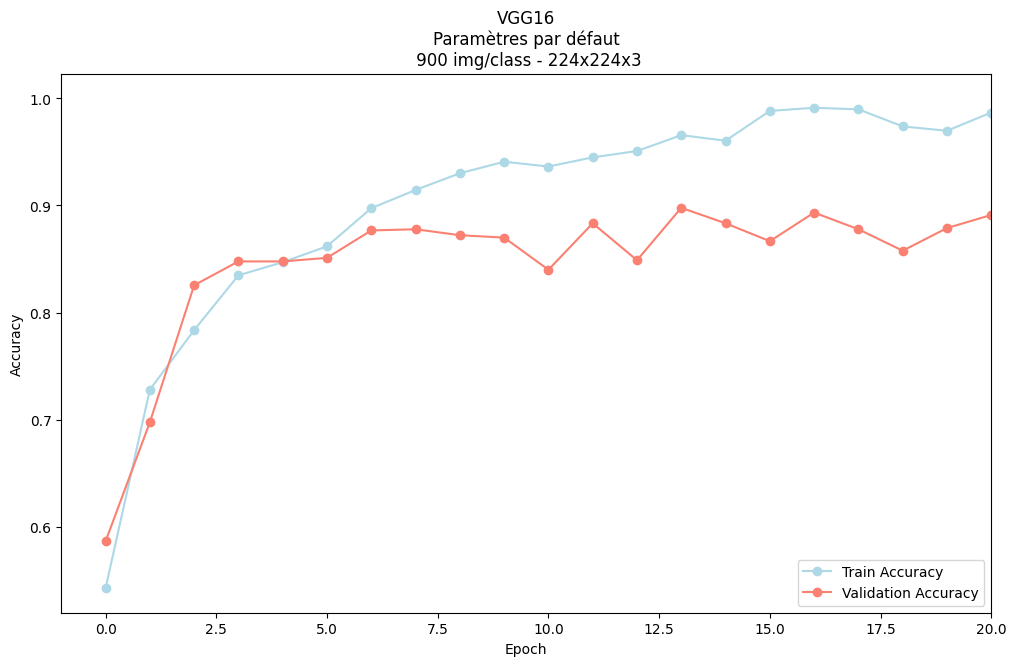

In [6]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['accuracy'],'bo-', label='Train Accuracy',color='lightblue')
plt.plot(history.history['val_accuracy'],'ro-', label='Validation Accuracy',color='salmon')
plt.title('VGG16\nParamètres par défaut\n 900 img/class - 224x224x3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(-1,20)
plt.legend(loc='lower right')
plt.show()

In [7]:
# Prédiction sur l'ensemble de test
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
#print("Matrice de confusion :")
#print(conf_matrix)

# Rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=['COVID', 'Lung', 'Normal', 'Viral'])
print(report)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step
              precision    recall  f1-score   support

       COVID       0.96      0.80      0.87       242
        Lung       0.77      0.93      0.84       216
      Normal       0.87      0.85      0.86       216
       Viral       0.98      0.98      0.98       226

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.90      0.89      0.89       900



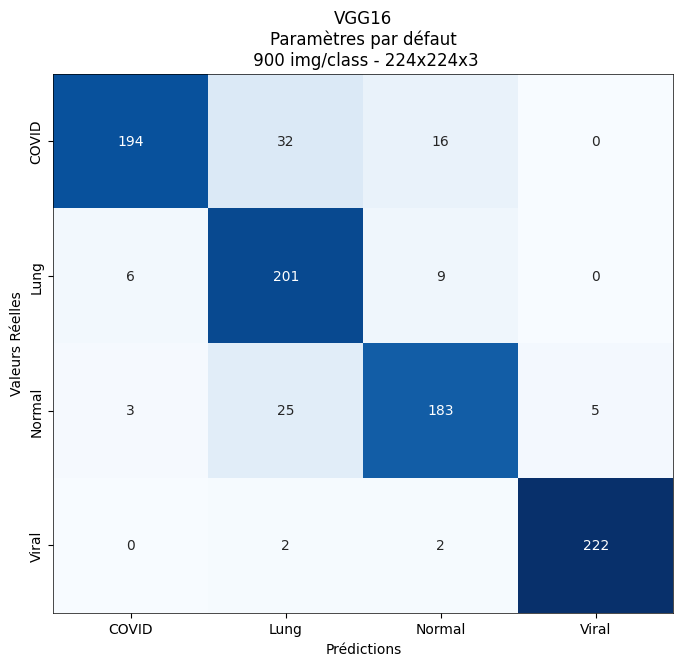

In [8]:
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=['COVID', 'Lung', 'Normal', 'Viral'],
            yticklabels=['COVID', 'Lung', 'Normal', 'Viral'])
plt.title('VGG16\nParamètres par défaut\n 900 img/class - 224x224x3')
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


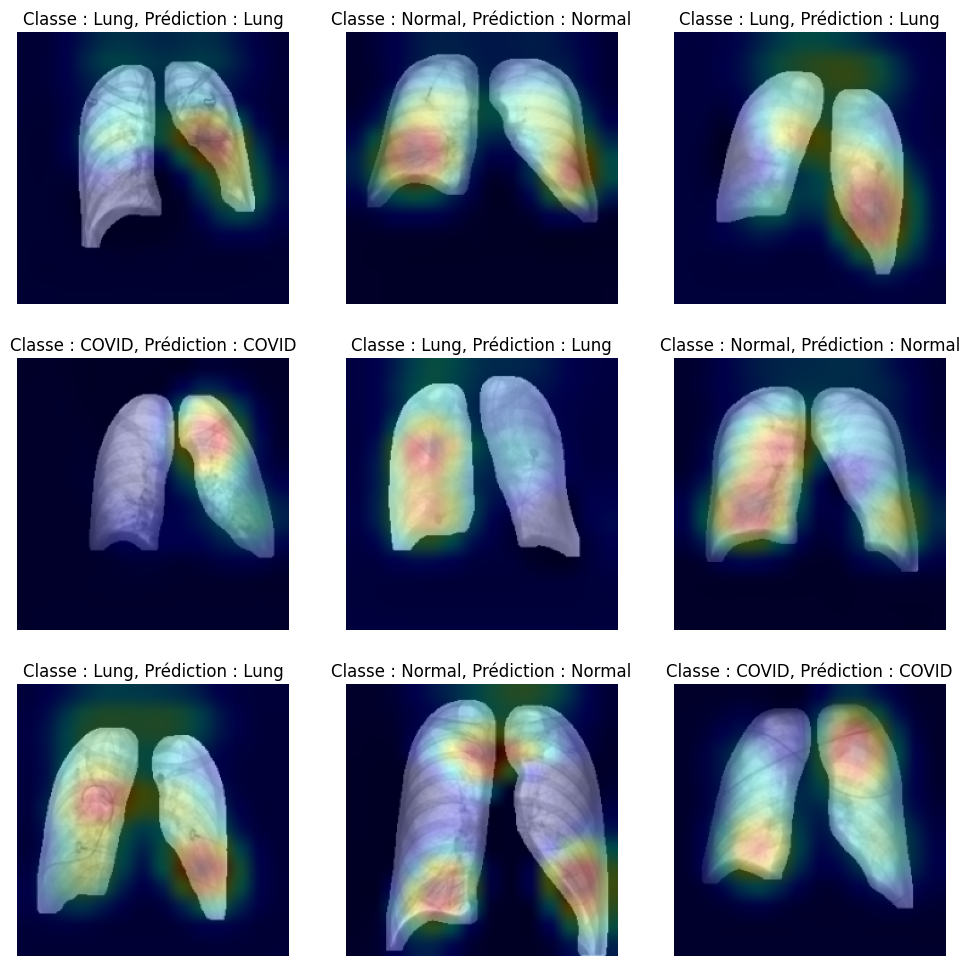

In [9]:
from grad_cam import make_gradcam_heatmap, save_and_display_gradcam
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.layers import Conv2D
     
classes = ['COVID', 'Lung', 'Normal', 'Viral']

y_test_classes = np.argmax(y_test, axis=1)
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Désactivation de l'activation softmax de la dernière couche
new_model.layers[-1].activation = None

# Identification du nom de la dernière couche Conv2D
last_conv_layer_name = None
for layer in reversed(new_model.layers):
    if isinstance(layer, Conv2D):
        last_conv_layer_name = layer.name
        break

# Préparation de la figure pour afficher 5 images
plt.figure(figsize=(12, 12))  # Largeur, hauteur en pouces
for i in range(9):
    R = random.randint(0, len(X_test) - 1)
    base_img = X_test[R]
    heatm_img = np.expand_dims(base_img, axis=0)
    img_cam = np.uint8(base_img * 255)  # Conversion de l'image pour affichage

    # Prédiction sans la couche softmax activée
    preds = new_model.predict(heatm_img)
    heatmap = make_gradcam_heatmap(heatm_img, new_model, last_conv_layer_name)
    grad_img = save_and_display_gradcam(img_cam, heatmap)

    # Vérification de la vraie classe et de la prédiction
    vraie = classes[y_test_classes[R]]
    prediction = classes[y_pred_classes[R]]

    # Affichage dans un sous-graphique
    plt.subplot(3, 3, i + 1)  # 1 ligne, 5 colonnes, ième position
    plt.imshow(grad_img)
    plt.title(f"Classe : {vraie}, Prédiction : {prediction}")
    plt.axis('off')  # Désactivation des axes pour une meilleure visibilité

plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


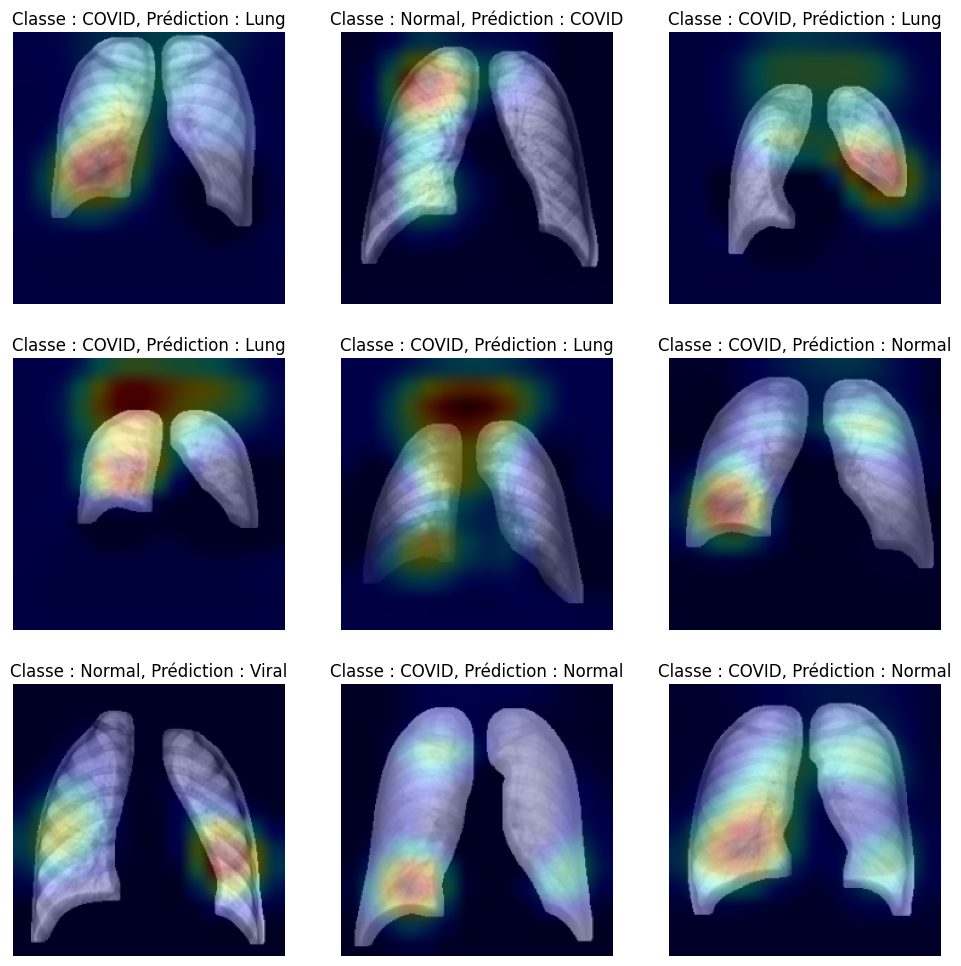

In [10]:
from grad_cam import make_gradcam_heatmap, save_and_display_gradcam
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.layers import Conv2D

classes = ['COVID', 'Lung', 'Normal', 'Viral']

y_test_classes = np.argmax(y_test, axis=1)
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

indices_diff = np.where(y_test_classes != y_pred_classes)[0]

# Désactivation de l'activation softmax de la dernière couche
new_model.layers[-1].activation = None

# Identification du nom de la dernière couche Conv2D
last_conv_layer_name = None
for layer in reversed(new_model.layers):
    if isinstance(layer, Conv2D):
        last_conv_layer_name = layer.name
        break

# Préparation de la figure pour afficher 5 images
plt.figure(figsize=(12, 12))  # Largeur, hauteur en pouces
for i in range(9):
    R = random.choice(indices_diff)
    base_img = X_test[R]
    heatm_img = np.expand_dims(base_img, axis=0)
    img_cam = np.uint8(base_img * 255)  # Conversion de l'image pour affichage

    # Prédiction sans la couche softmax activée
    preds = new_model.predict(heatm_img)
    heatmap = make_gradcam_heatmap(heatm_img, new_model, last_conv_layer_name)
    grad_img = save_and_display_gradcam(img_cam, heatmap)

    # Vérification de la vraie classe et de la prédiction
    vraie = classes[y_test_classes[R]]
    prediction = classes[y_pred_classes[R]]

    # Affichage dans un sous-graphique
    plt.subplot(3, 3, i + 1)  # 1 ligne, 5 colonnes, ième position
    plt.imshow(grad_img)
    plt.title(f"Classe : {vraie}, Prédiction : {prediction}")
    plt.axis('off')  # Désactivation des axes pour une meilleure visibilité

plt.show()